In [1]:
# Fill in your name using the format below and student ID number
your_name = "BONOMO, TOMMASO"
student_id = "1511831"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# Uncomment the following line to run in Google Colab
# !pip install --quiet openml packaging 

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
# # Uncomment the following line to run in Google Colab
# #%tensorflow_version 2.x
# import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi TOMMASO, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
base_dir = "./storage/"

In [0]:
# base_dir = '/content/drive/My Drive/Colab Notebooks/assignment-3-tommasobonomo/' # For Google Colab

In [8]:
# #Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [8]:
# Paperspace
import os
oml.config.cache_directory = os.path.expanduser('./storage')

In [0]:
# # Use OpenML caching in Colab
# # On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [9]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [10]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [11]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

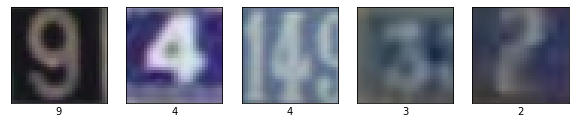

In [12]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [26]:
import os
import gzip
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow
from tensorflow.keras.models import model_from_json

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """
    Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        # if a json description is available, load config and then weights
        if os.path.isfile(os.path.join(base_dir, name+'.json')):
            json_file = open(os.path.join(base_dir, name+'.json'), 'r')
            loaded_model_json = json_file.read()
            json_file.close()
            model = model_from_json(loaded_model_json)
            model.load_weights(os.path.join(base_dir, name+extension))
        # else just load the entire model from hdf5 file
        else:
            model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    path = os.path.join(base_dir, name+extension)
    model.save(path)
    size = os.path.getsize(path)
    # If model > 100MB, store the weights and architecture only.
    if size > 100*1024*1024:
        print("Model larger than 100MB, storing weights only.")
        model.save_weights(path)
        model_json = model.to_json()
        with open(os.path.join(base_dir, name+".json"), "w") as json_file:
            json_file.write(model_json)

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, callbacks = [], **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

In [14]:
from tensorflow.keras import models, layers, optimizers
def build_model_1_1():
    model = models.Sequential([
        layers.Reshape((3072,), input_shape=(32,32,3)),
        layers.Dense(700, activation="relu"),
        layers.Dense(300, activation="relu"),
        layers.Dense(120, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

Loading model from file
Success!
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 700)               2151100   
_________________________________________________________________
dense_3 (Dense)              (None, 300)               210300    
_________________________________________________________________
dense_4 (Dense)              (None, 120)               36120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1210      
Total params: 2,398,730
Trainable params: 2,398,730
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.345601  0.195911  0

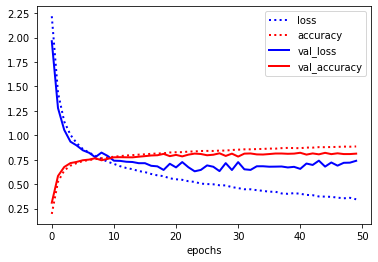

In [15]:
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=128)
answer_q_1_1 = """
To construct a baseline model I started with a network that would have small
capacity for the given task (3 hidden dense layers of 100, 50, 20 neurons each).
This network trained until a validation accuracy of around 0.75, then the loss
flattened out. I then increased the number of neurons for each layer, stopping
when I started to have diminishing returns. I found that the optimizer Adam
performed much better than RMSprop, at standard learning rate. The model clearly
overfits.
"""
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [16]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [17]:
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

Loading model from file
Success!
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 700)               717500    
_________________________________________________________________
dense_11 (Dense)             (None, 300)               210300    
_________________________________________________________________
dense_12 (Dense)             (None, 120)               36120     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1210      
Total params: 965,130
Trainable params: 965,130
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.331191  0.304104  0.5

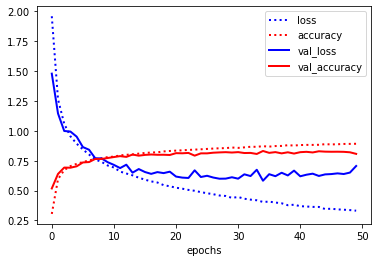

In [18]:
# Adjusted model
def build_model_1_2():
    model = models.Sequential([
        layers.Reshape((1024,), input_shape=(32,32,1)),
        layers.Dense(700, activation="relu"),
        layers.Dense(300, activation="relu"),
        layers.Dense(120, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, epochs=50, batch_size=128)
answer_q_1_2 = """
For grayscale, we have 3 times less weights to learn in the first Dense layer 
(205k instead of 614k). Improvements are only marginal: 1% better on the 
validation accuracy. This could be explained by the efficiency of the ReLU 
activation in quickly bringing to zero the weights of the extra noise in the RGB
model. This model appears to also appears to overfit less, but not by a big margin.
It still overfits significantly.
"""
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 700)               717500    
_________________________________________________________________
dropout_21 (Dropout)         (None, 700)               0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 700)               2800      
_________________________________________________________________
dense_29 (Dense)             (None, 300)               210300    
_________________________________________________________________
dropout_22 (Dropout)         (None, 300)               0         
_________________________________________________________________
batch_normalization_2

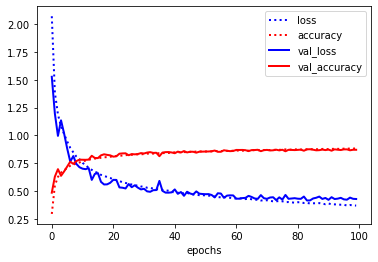

In [19]:
def build_model_1_3():
    model = models.Sequential([
        layers.Reshape((1024,), input_shape=(32,32,1)),
        layers.Dense(700, activation="selu"),
        layers.Dropout(0.25),
        layers.BatchNormalization(),
        layers.Dense(300, activation="selu"),
        layers.Dropout(0.1),
        layers.BatchNormalization(),
        layers.Dense(120, activation="selu"),
        layers.Dropout(0.45),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.001),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model


run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=False, epochs=100, batch_size=128)
answer_q_1_3 = """
I added Dropout and BatchNormalization layers in between Dense layers to
brake up unimportant relationships and normalise the activations. This
decreased the model capacity to a point of underfitting. Therefore I used
SELU activation instead of ReLU because it was killing too many nodes. This
worked in part. I then tuned the dropout rate (in interval [0, 0.5]) and
Adam's learning rate (chosen in {0.001, 0.0001, 1e-05, 1e-06}) through the
HyperBand algorithm. Results are good but not excellent.
"""
print("Answer is {} characters long".format(len(answer_q_1_3)))

In [20]:
# from kerastuner import Hyperband, HyperParameters
# def hypertuned_model(hp: HyperParameters) -> models.Model:
#     model = models.Sequential([
#         layers.Reshape((1024,), input_shape=(32,32,1)),
#         layers.Dense(700, activation="selu"),
#         layers.Dropout(hp.Float("dropout_1", 0, 0.5, sampling="linear")),
#         layers.BatchNormalization(),
#         layers.Dense(300, activation="selu"),
#         layers.Dropout(hp.Float("dropout_2", 0, 0.5, sampling="linear")),
#         layers.BatchNormalization(),
#         layers.Dense(120, activation="selu"),
#         layers.Dropout(hp.Float("dropout_3", 0, 0.5, sampling="linear")),
#         layers.BatchNormalization(),
#         layers.Dense(10, activation="softmax")
#     ])

#     model.compile(
#         optimizer=optimizers.Adam(hp.Choice(
#             "learning_rate", 
#             [1e-3, 1e-4, 1e-5, 1e-6],
#             ordered=True,
#             default=1e-4
#         )),
#         loss="categorical_crossentropy",
#         metrics=["accuracy"]
#     )
#     return model

# tuner = Hyperband(
#     hypertuned_model,
#     "val_accuracy",
#     max_epochs=30
# )
# tuner.search_space_summary()

In [21]:
# Long running time, results are below
# tuner.search(
#     preprocessed_split[0], 
#     preprocessed_split[2], 
#     epochs=5, 
#     validation_data=(preprocessed_split[1], preprocessed_split[3])
# )
# tuner.get_best_hyperparameters()[0].values

These are the resulting hyperparameters:

```py
{
    'dropout_1': 0.24337152929122935,
    'dropout_2': 0.1307397305296073,
    'dropout_3': 0.4626440361010403,
    'learning_rate': 0.001
}
```

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_183 (Conv2D)          (None, 30, 30, 64)        640       
_________________________________________________________________
batch_normalization_153 (Bat (None, 30, 30, 64)        120       
_________________________________________________________________
re_lu_118 (ReLU)             (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_184 (Conv2D)          (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_154 (Bat (None, 30, 30, 64)        120       
_________________________________________________________________
re_lu_119 (ReLU)             (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_99 (Ma

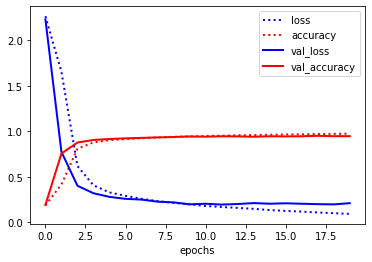

In [42]:
def build_model_2_1():
    model = models.Sequential([
            
        # Block 1
        layers.Conv2D(64, (3, 3), padding="valid", input_shape=(32, 32, 1)),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.Conv2D(64, (3, 3), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.MaxPool2D((2, 2), padding="same"),
        
        layers.Dropout(0.2),

        # Block 2
        layers.Conv2D(128, (3, 3), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.Conv2D(128, (3, 3), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.MaxPool2D((2, 2), padding="same"),

        layers.Dropout(0.2),
        
        # Block 3
        layers.Conv2D(256, (2, 2), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.Conv2D(256, (2, 2), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.MaxPool2D((2, 2), padding="same"),

        layers.Dropout(0.2),
        
        # Block 4
        layers.Conv2D(512, (2, 2), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.Conv2D(512, (2, 2), padding="same"),
        layers.BatchNormalization(momentum=0., axis=1),
        layers.ReLU(),
        layers.MaxPool2D((2, 2), padding="same"),
        
        layers.Dropout(0.2),
        
        layers.Flatten(),
        layers.Dense(1028, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(100, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer=optimizers.Adam(amsgrad=True),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=20, batch_size=128)
answer_q_2_1 = """
I started by alternating between a Convolutional layer and a Max Pooling layer,
but I could not construct a very deep network because of the halving in size done by
Max Pooling. The results were good but not great. I had to stack more than one Conv
layer between each Max Pooling layer to obtain depth in the network. This reminded me
of VGG16, so I took inspiration regarding the Batch Normalisation layers. I tried to
maintain constant the product between number of filters and dimensions of the feature map.
I used two Conv layers for each block. I added Dropout layers for regularisation. Finally,
I added two Dense hidden layers before the final output layer. The performance of the model
is very good, around 0.95 on validation accuracy, nearly 8% better than model_1_3, with some
overfitting
"""
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        640       
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 64)        120       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 30, 30, 64)        120       
_________________________________________________________________
re_lu_9 (ReLU)               (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxP

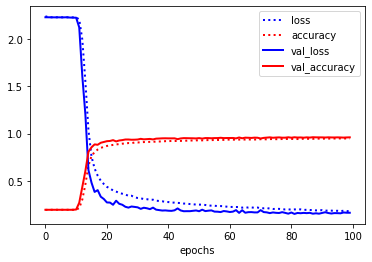

In [126]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=0.4,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    fill_mode="nearest"
)

X_train_gray, X_val_gray, y_train_gray, y_val_gray = preprocessed_split

augmented_split = datagen.flow(X_train_gray, y_train_gray, batch_size=8), X_val_gray, y_val_gray
run_evaluation(
    "model_2_2", build_model_2_1, augmented_split, base_dir, train=False, 
    generator=True, steps_per_epoch=len(X_train_gray) // 8, epochs=100, 
    batch_size=None
)
answer_q_2_2 = """
To augment the available data I created an image generator that randomly rotated,
sheared or shifted (horizontally and vertically) the input images. I found that
flipping images did not help, as is sensible to assume given that we are trying to
recognise numbers. I also found that it was better to create smaller batches of
randomly augmented images, as the number of available images is sufficient. The
results are very good, as we achieve a 0.961 validation accuracy with nearly no
overfitting
"""
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [118]:
from sklearn.metrics import confusion_matrix

model_2_2 = load_model_from_file(base_dir, "model_2_2")
X_test_gray = rgb2gray(X_test)

test_accuracy_3_1 = model_2_2.evaluate(X_test_gray, y_test)[1]

def plot_confusion_matrix():
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    X_test_gray = rgb2gray(X_test)

    y_pred = np.argmax(
        np.roll(model_2_2.predict(X_test_gray), 1, axis=1),
        axis=1)
    y_true = np.argmax(np.roll(y_test, 1, axis=1), axis=1)

    matrix = confusion_matrix(y_true, y_pred)
    xticklabels =  ["0"] + [str(x) for x in range(1, 10)]
    yticklabels = [str(x) for x in range(9, 0, -1)] + ["0"]
    fmt = "%.2f"

    fig, ax = plt.subplots(figsize=(10, 10))
    img = ax.pcolor(matrix)
    img.update_scalarmappable()
    ax.set_xlabel("Prediction", fontsize=10)
    ax.set_ylabel("Truth", fontsize=10)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
    
    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12, labelrotation=90)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(), img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center", size=10)
    return img

def plot_misclassifications():
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    X_test_gray = rgb2gray(X_test)

    y_pred = np.argmax(
        np.roll(model_2_2.predict(X_test_gray), 1, axis=1),
        axis=1)
    y_true = np.argmax(np.roll(y_test, 1, axis=1), axis=1)
    
    class_number = 2
    n_plots = 5
    indexes_class = np.nonzero(y_true == class_number)[0]
    class_X = X_test_gray[indexes_class]
    class_true = y_true[indexes_class]
    class_pred = y_pred[indexes_class]
    indexes_wrong_class = np.nonzero(class_pred != class_number)[0]
    sample_wrong_indexes = [2352, 518, 2754, 2453, 1091] #np.random.choice(indexes_wrong_class, n_plots, replace=False)

    fig, ax = plt.subplots(1, n_plots, figsize=(10, 5))
    for i, index in enumerate(sample_wrong_indexes):
        image = class_X[index].reshape(32, 32)
        ax[i].imshow(image, cmap="Greys")
        ax[i].set_xlabel(class_pred[index])
        ax[i].set_xticks([])
        ax[i].set_yticks([])
    plt.show()

    print(sample_wrong_indexes)
    

answer_q_3_1 = """
Looking at the confusion matrix, there are not a lot of classes that are
mixed up with one another. The classes that are most confused are 8 and 6,
with the most number of test images that are not predicted correctly. But
the accuracy is very high, 0.959 on the test set.
Looking at misclassifications, it is clear that a lot of images are
unrecognisable even to a human eye (index 2352 and 1091) because of noise. 
Some other images have a very strange background compared to the other images,
with features that may distract the model (index 518 and 2453). 
Finally, some images are mislabelled. My model actually predicts the correct 
class, taking into account the most central number to recognise (index 1091).
"""
print("Answer is {} characters long".format(len(answer_q_3_1)))

19858/19858 [==============================] - 4s 220us/sample - loss: 0.1615 - accuracy: 0.9590
Answer is 717 characters long


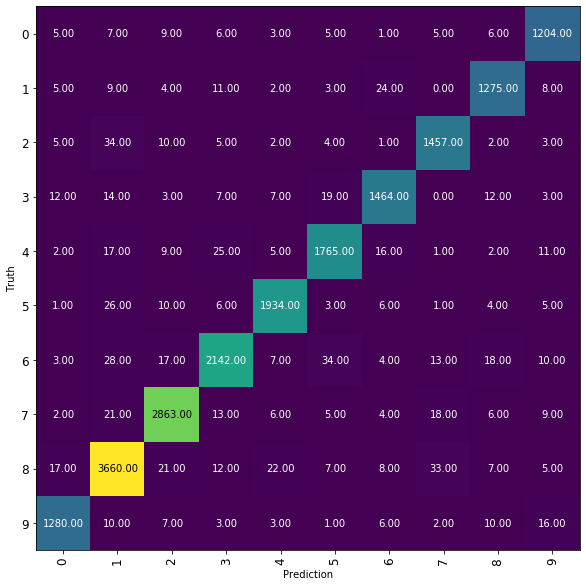

In [49]:
plot_confusion_matrix()

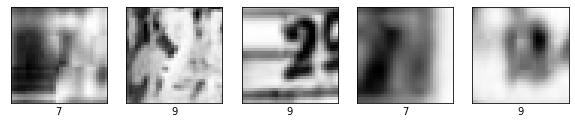

[2352  518 2754 2453 1091]


In [117]:
plot_misclassifications()

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [81]:
def plot_activations():
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    test_image = np.array([X_test_gray[0]])
    layer_outputs = [layer.output for layer in model_2_2.layers]
    layer_names = [layer.name for layer in model_2_2.layers]
    activation_model = models.Model(inputs=model_2_2.input, outputs=layer_outputs)
    activations = activation_model.predict(test_image)

    images_per_row = 16

    for name, layer_activations in zip(layer_names, activations):
        if name.startswith("conv2d"):
            # Moving filter dimension first, so we get shape (64, 30, 30) for first layer
            layer_activations = np.moveaxis(layer_activations.squeeze(), -1, 0)
            layer_activations = (layer_activations - layer_activations.min()) / \
                                (layer_activations.max() - layer_activations.min())
            n_filters = layer_activations.shape[0]
            filter_size = layer_activations.shape[-1]

            n_rows = n_filters // images_per_row
            total_rows_px = n_rows * filter_size + n_rows - 1                  # 1px separation line
            total_cols_px = images_per_row * filter_size + images_per_row - 1  # 1px separation line
            display_grid = np.ones((total_rows_px, total_cols_px))

            for row in range(n_rows):
                for col in range(images_per_row):
                    channel_image = layer_activations[row * images_per_row + col]
                    # Visual enhancements
                    channel_image -= channel_image.mean()
                    channel_image /= channel_image.std()
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    display_grid[(row * filter_size + row) : ((row + 1) * (filter_size) + row),
                                 (col * filter_size + col) : ((col + 1) * (filter_size) + col)] = channel_image
            # Display the grid
            scale = 1. / filter_size
            plt.figure(figsize=(scale * display_grid.shape[1],
                                scale * display_grid.shape[0]))
            plt.title(f"Activations of {name}")
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')
            
answer_q_3_2 = """
Visualising the activations of the filter maps for all Convolutional layers
shows that the model is indeed learning useful things. In the first two filter
maps there are filters that capture lines of various directions, exemplified
by "shadows" that were not present in the input image. As we explore feature
maps of block 2, the patterns become more abstract, but we can recognise some
patterns such as the S shape of the number 8. Feature maps of blocks 3 and 4
are not comprehensible for us.
"""
print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 496 characters long


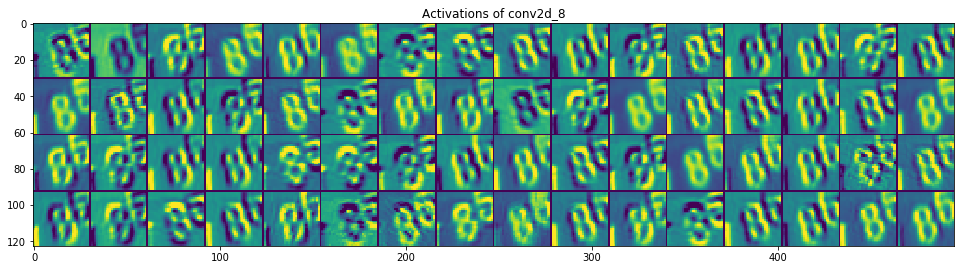

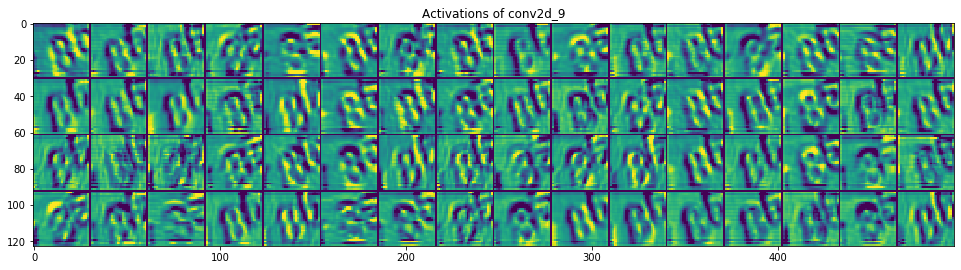

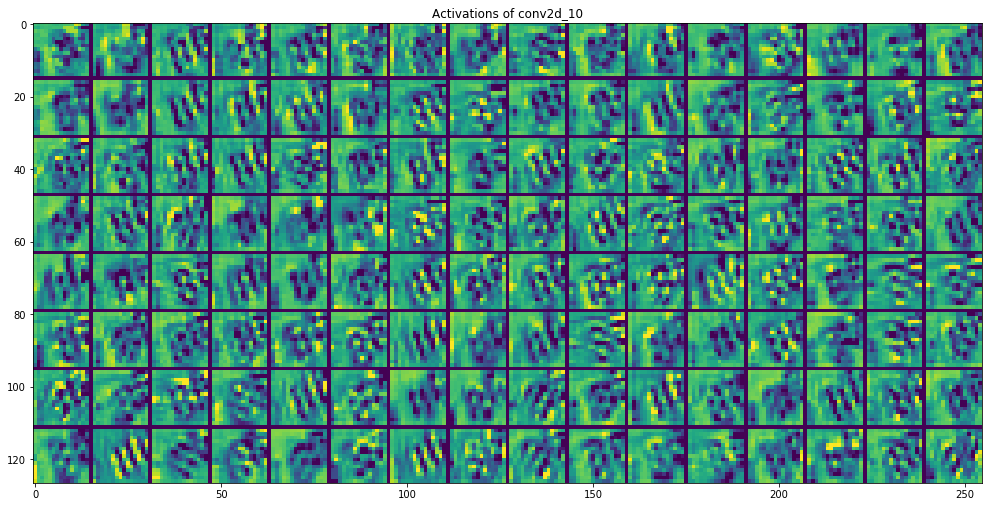

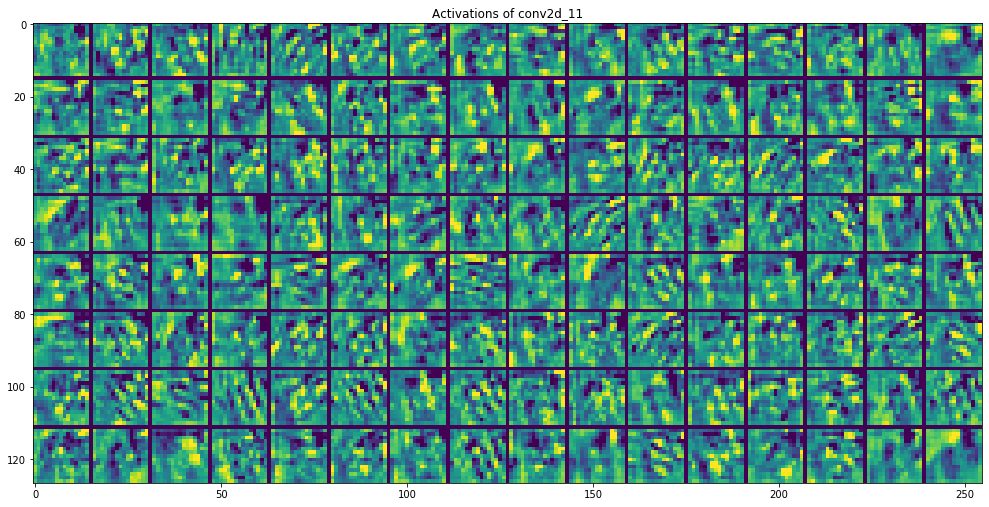

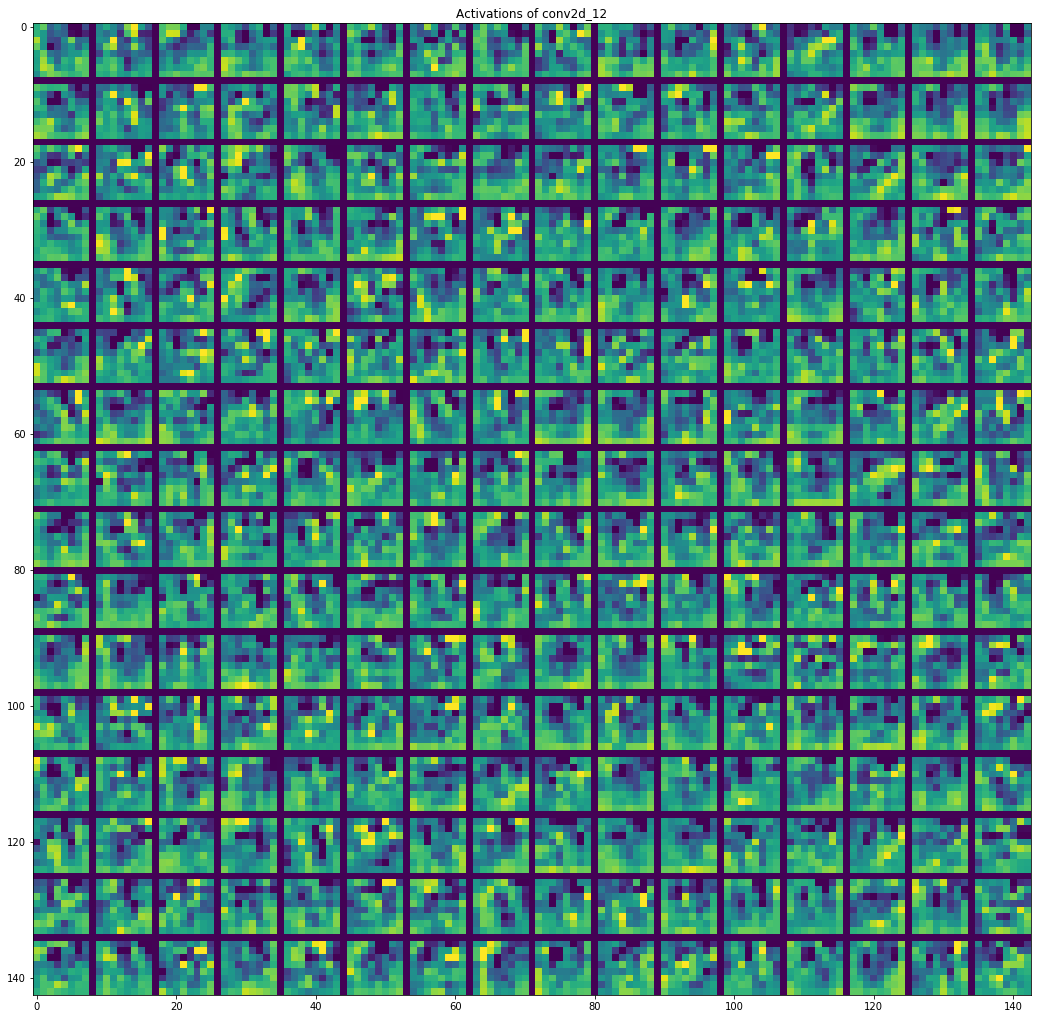

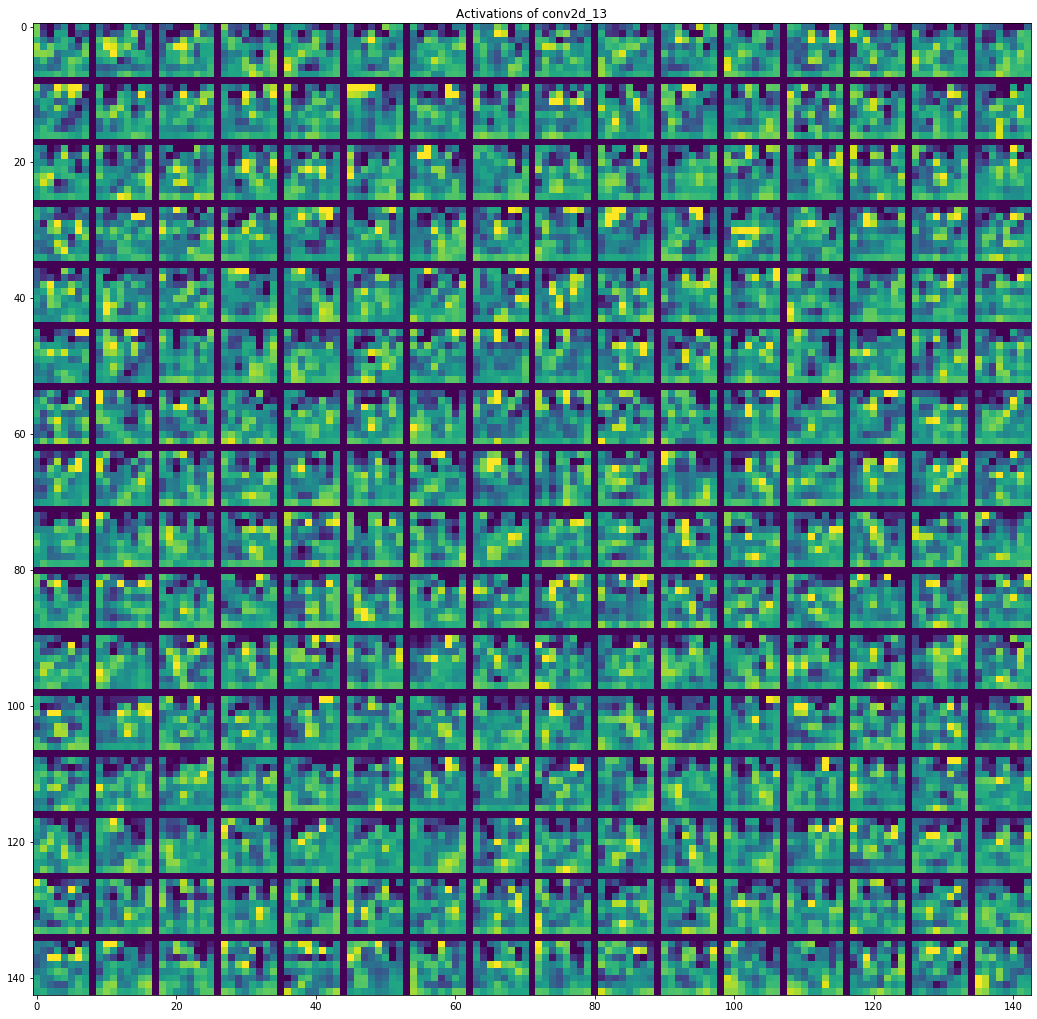

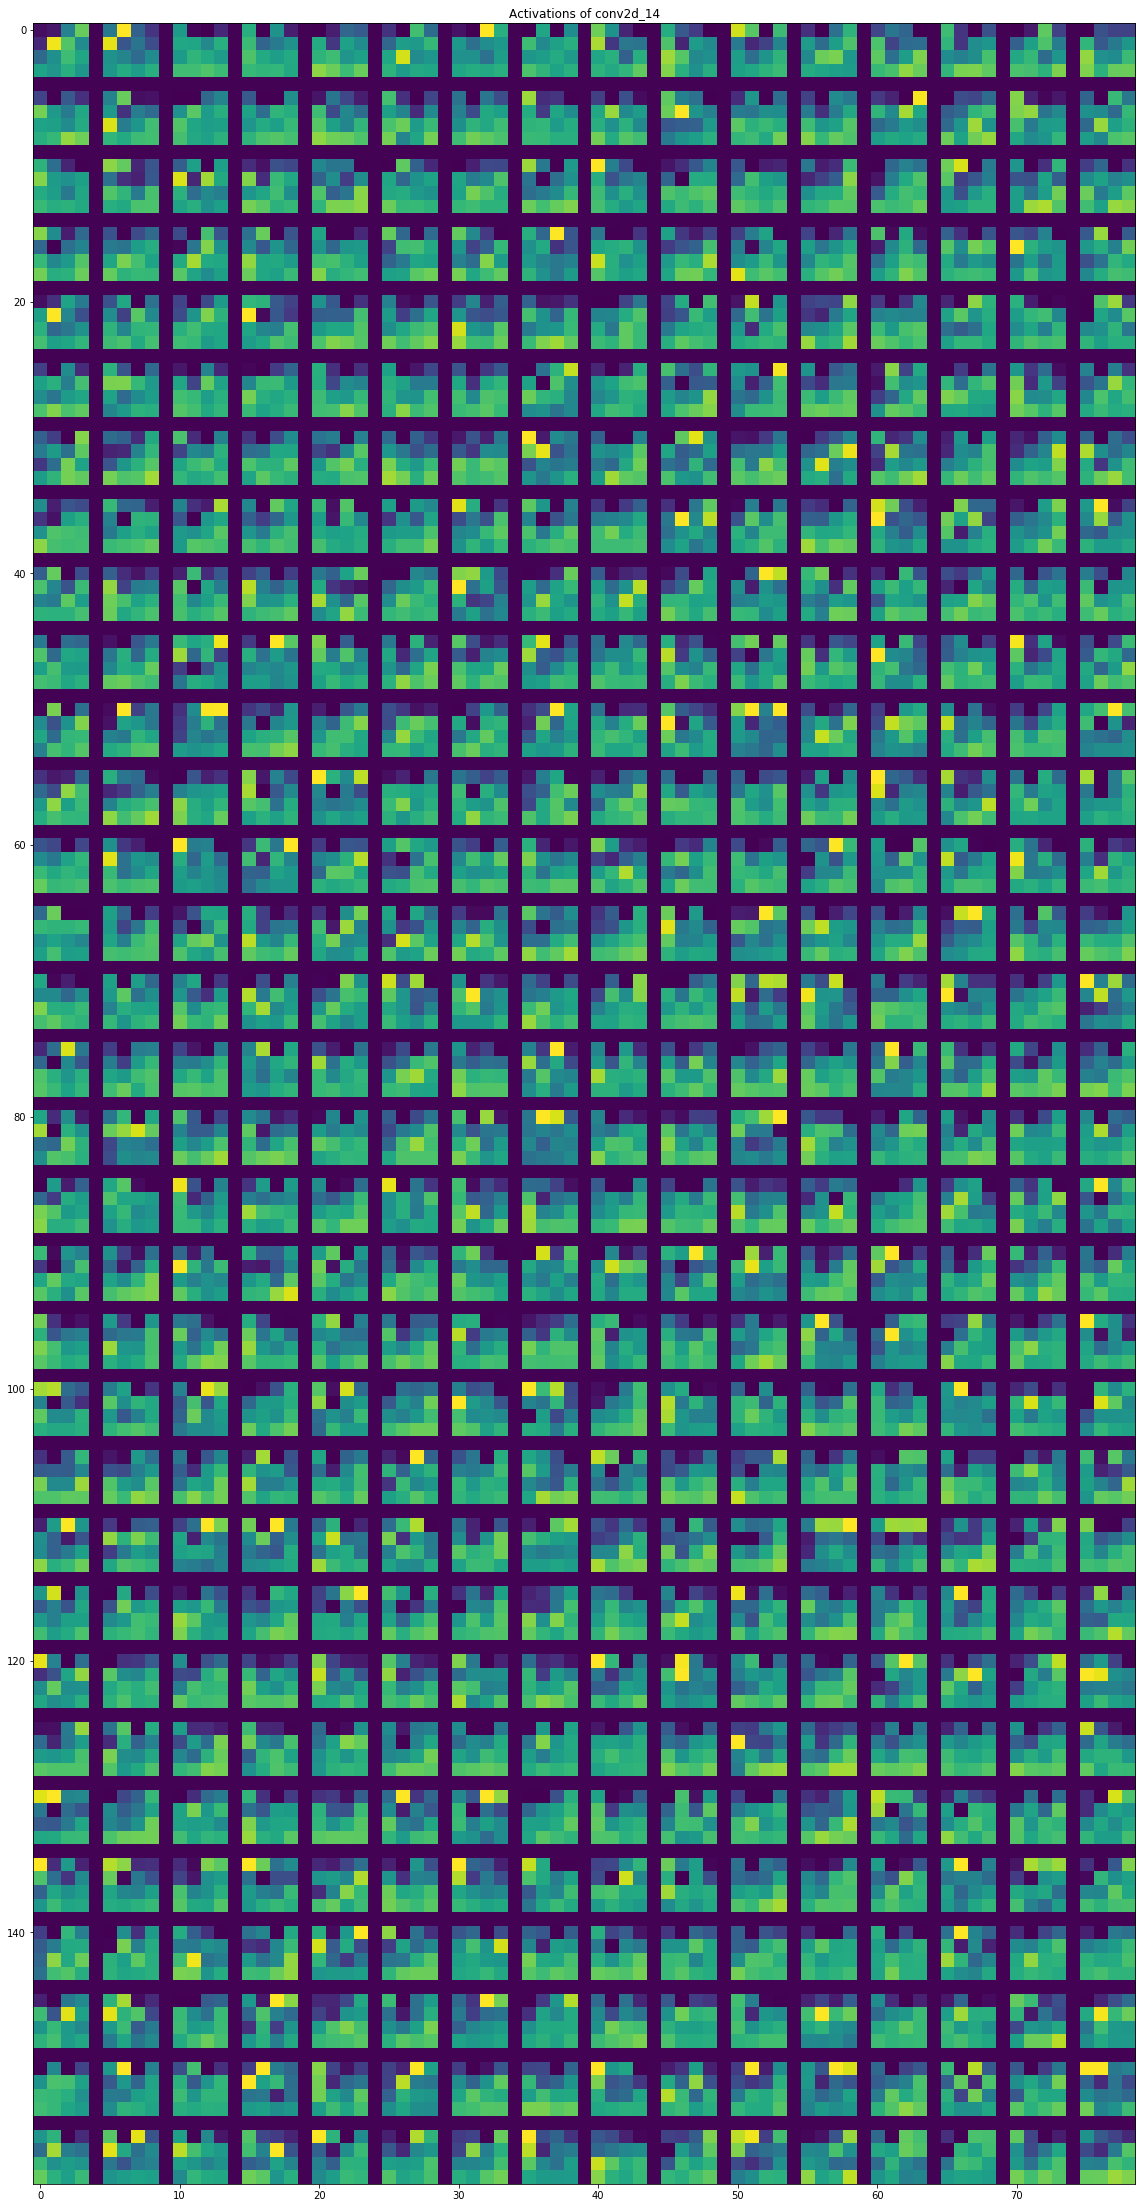

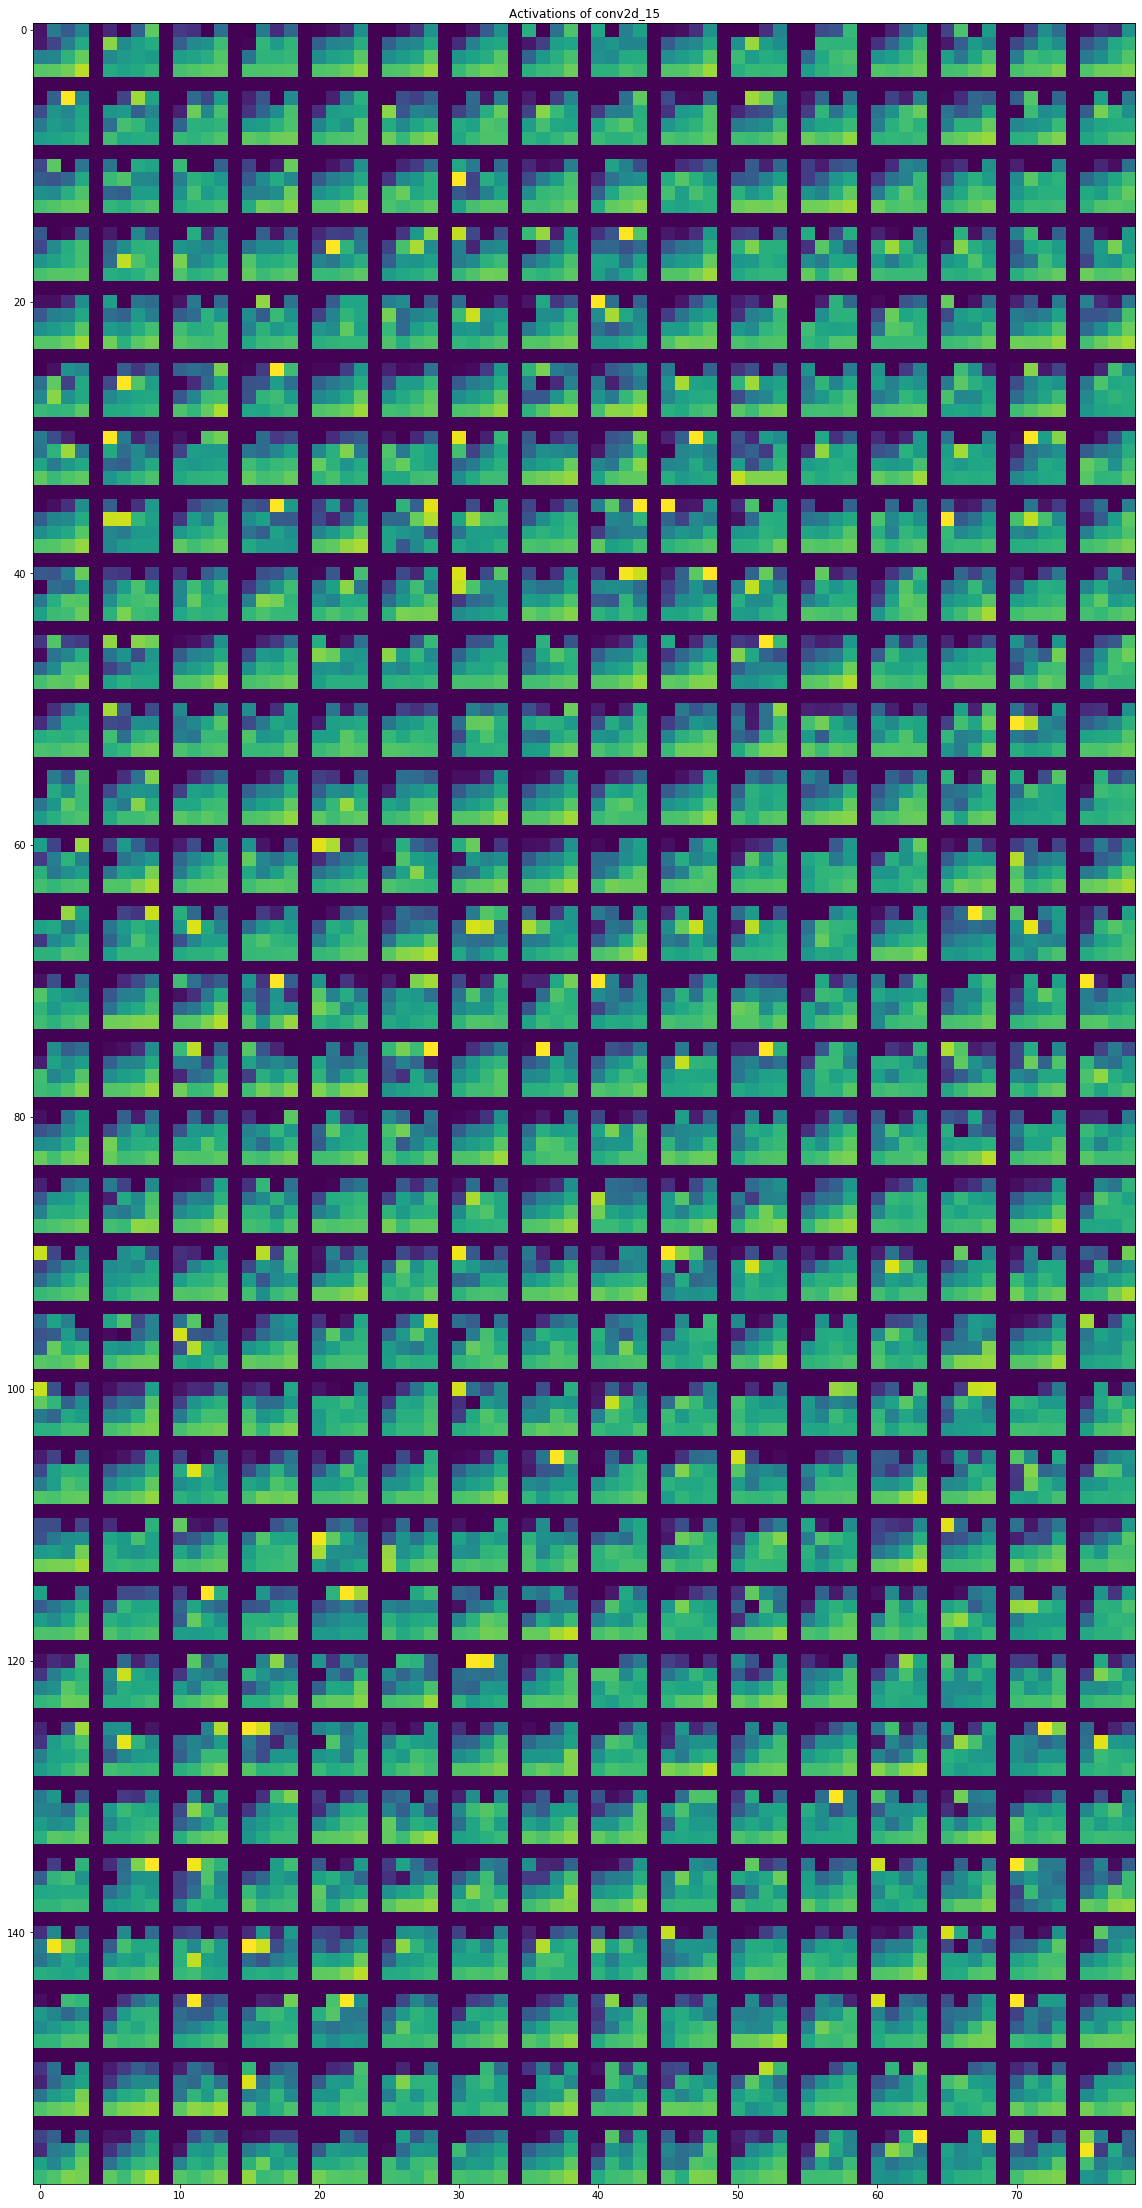

In [74]:
plot_activations()

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

In [77]:
from tensorflow import GradientTape

def build_activation_map():
    # Load model, define test image and true class
    model_2_2 = load_model_from_file(base_dir, "model_2_2")
    test_image = np.array(X_test_gray[0:1])
    index_true_class = np.argmax(y_test[0])

    # Split model on last conv layer in first_part and second_part, needed for gradient
    layer_names = [layer.name for layer in model_2_2.layers]
    index_last_conv = np.nonzero([name.startswith("conv2d") for name in layer_names])[0][-1]
    first_part = models.Sequential(model_2_2.layers[:index_last_conv + 1])
    second_part = models.Sequential(model_2_2.layers[index_last_conv + 1:])

    # Calculate gradient of node that corresponds to the true class wrt last conv layer 
    with GradientTape() as tape:
        conv_activation = first_part(test_image)
        class_activations = second_part(conv_activation)[:, index_true_class]
    gradient = tape.gradient(class_activations, conv_activation)

    # Multiply output of feature map by gradient and sum over channels
    channel_activation = (conv_activation * gradient).numpy().sum(axis=3)
    
    return channel_activation

def plot_activation_map():
    channel_activation = build_activation_map()
    
    # Normalise channel activation heatmap between [0, 1]
    channel_min = channel_activation.min()
    channel_max = channel_activation.max()
    channel_activation_norm = (channel_activation - channel_min) / (channel_max - channel_min)
    plt.imshow(channel_activation_norm.squeeze(), cmap="gray")

def plot_3_3():
    test_image = np.array(X_test_gray[0:1])
    
    channel_activation = build_activation_map()
    # Normalise channel activation heatmap between [0, 1]
    channel_min = channel_activation.min()
    channel_max = channel_activation.max()
    channel_activation_norm = (channel_activation - channel_min) / (channel_max - channel_min)

    # Plot superposition of two images
    dx, dy = 0.01, 0.01
    xx = np.arange(0, 1, dx)
    yy = np.arange(0, 1, dy)
    XX, YY = np.meshgrid(xx, yy)

    extent = np.min(xx), np.max(xx), np.min(yy), np.max(yy)
    fig = plt.figure(frameon=False, figsize=(10,10))

    im1 = plt.imshow(
        test_image.squeeze(), cmap=plt.cm.gray, interpolation="nearest", extent=extent
    )
    im2 = plt.imshow(
        channel_activation_norm.squeeze(), cmap=plt.cm.viridis, alpha=0.6, interpolation="gaussian", extent=extent
    )
    plt.show()

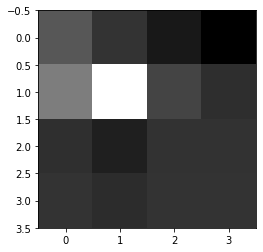

In [79]:
plot_activation_map()

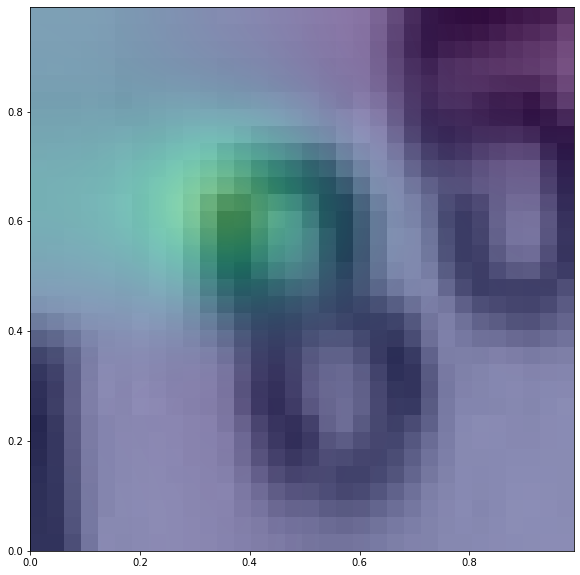

In [78]:
plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Loading model from file
Success!
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_27 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1010      
Total params: 14,766,998
Trainable params: 14,766,998
Non-trainable params: 0
_________________________________________________________________
None
         loss  accuracy  val_loss  val_accuracy
min  0.197631  0.730344  0.268277      0.853402
max  0.816875  0.940293  0.460530      0.919242
Answer is 492 characters long


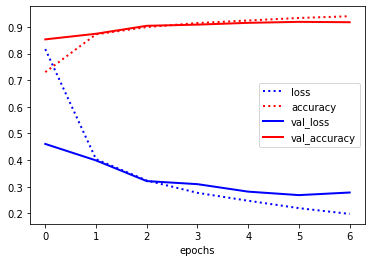

In [120]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

def build_model_4_1():
    vgg16_base = VGG16(include_top=False, weights="imagenet", input_shape=(32,32,3),
                    pooling=None)

    model_4_1 = models.Sequential([
            vgg16_base,
            layers.Flatten(),
            layers.Dense(100, activation="relu"),
            layers.Dense(10, activation="softmax")
    ])

    model_4_1.compile(
        optimizer=optimizers.Adam(learning_rate=1e-05),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model_4_1

early_stopping = EarlyStopping(monitor="val_loss")

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=100, batch_size=128, callbacks=[early_stopping])
answer_q_4_1 = """
I added a Dense hidden layer of 100 neurons with ReLU activation on top of the
convolutional base of VGG16. Initially, I tried training the model with the
convolutional base frozen, but the validation accuracy was not good. I therefore 
progressively unfroze convolutional layers, but it became apparent that the best 
scores were achieved by fine-tuning the whole model. I used a low learning rate and
used early stopping to avoid potential disasterous loss of information and overfitting.
"""
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [124]:
import pickle
import gzip

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def store_embedding(X, name):  
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
        pickle.dump(X, file_pi)

def load_embedding(name):
    with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
        return pickle.load(file_pi)

def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    model_4_1 = load_model_from_file(base_dir=base_dir, name="model_4_1")
    train_embeddings = model_4_1.layers[0].predict(X_train).squeeze()
    test_embeddings = model_4_1.layers[0].predict(X_test).squeeze()
    store_embedding(train_embeddings, "X_train")
    store_embedding(test_embeddings, "X_test")

def generate_pipeline():
    """ Returns an sklearn pipeline.
    Specifically, returns best estimator obtained through bayesian optimization of hyperparams of random forest
    """
    if os.path.exists(os.path.join(base_dir, "bayes_search_rf.p")):
        with gzip.open(os.path.join(base_dir, "bayes_search_rf.p"), "rb") as file_pi:
            bayes_search = pickle.load(file_pi)
        best_params = {key.split("__")[1]: value 
                       for key, value in bayes_search.best_params_.items()}
    else:
        best_params = {
            "max_depth": 102,
            "max_features": "log2",
            "min_samples_leaf": 2,       
            "min_samples_split": 6,
            "n_estimators": 871
        }
    
    return random_forest_pipeline(best_params)
    
    
def random_forest_pipeline(params):
    classifier = RandomForestClassifier(n_jobs=-1, oob_score=True, **params)
    pipeline = Pipeline(steps=[("classifier", classifier)])
    return pipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
    """ Evaluates the given pipeline, trained on the given embedded training set and 
        evaluated on the supplied embedded test set. Returns the accuracy score.
    """
    pipeline.fit(X_train, y_train)
    return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
    """ Runs 'evaluate_pipeline' with embedded versions of the input data 
    and returns the accuracy.
    """
    if not os.path.exists(os.path.join(base_dir, "X_train_embedding.p")) or \
       not os.path.exists(os.path.join(base_dir, "X_test_embedding.p")):
        store_embeddings()
    
    X_train_embedded = load_embedding("X_train")
    X_test_embedded = load_embedding("X_test")
    y_train_int = np.argmax(np.roll(y_train, 1, axis=1), axis=1)
    y_test_int = np.argmax(np.roll(y_test, 1, axis=1), axis=1)
    
    pipeline = generate_pipeline()
    return evaluate_pipeline(pipeline, X_train_embedded, y_train_int, X_test_embedded, y_test_int)

answer_q_4_2 = """
I implemented a Random Forest as the classifier in my pipeline. I tried 
applying standard scaling to the embeddings, but the results were not as good
as without scaling. This is probably due to the nature of the Random Forest algorithm.
I then tuned hyperparameters n_estimators, max_depth, max_features, min_samples_leaf,
min_samples_split through Bayesian Optimisation on the validation set. The final test
score was 0.953, which is very close to model_2_2's 0.959, obtained on grayscale data.
"""
print("Pipeline:", generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline: Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=102, max_features='log2',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2, min_samples_split=6,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=871, n_jobs=-1,
                                        oob_score=True, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
Answer is 498 characters long


In [103]:
# from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
# from skopt import BayesSearchCV
# def random_optimization_rf(pipeline: Pipeline) -> RandomizedSearchCV:
#     """
#     Performs a random search on hyperparameters of passed Pipeline.
#     It assumes that the pipeline has a step ("classifier", RandomForestClassifier())
#     """
#     param_grid = {
#         "classifier__n_estimators": np.linspace(100, 1000, num=10, dtype=int),
#         "classifier__max_features": ["log2", "sqrt", None],
#         "classifier__max_depth": list(range(10, 101, 10)) + [None],
#         "classifier__min_samples_split": [2, 5, 10],
#         "classifier__min_samples_leaf": [1, 2, 4]
#     }
#     y_train_int = np.argmax(np.roll(y_train, 1, axis=1), axis=1)
#     y_test_int = np.argmax(np.roll(y_test, 1, axis=1), axis=1)
    
#     cross_validation_split = StratifiedKFold(n_splits=3, shuffle=True)
#     random_search = RandomizedSearchCV(pipeline, param_grid, scoring="accuracy", cv=cross_validation_split,
#                                        verbose=2, n_jobs=-1)
#     random_search.fit(load_embedding("X_train"), y_train_int)
#     return random_search

# def bayesian_optimization_rf(pipeline: Pipeline) -> BayesSearchCV:
#     """
#     Performs a Bayesian Optimization of hyperparameters of passed Pipeline.
#     It assumes that the pipeline has a step ("classifier", RandomForestClassifier())
#     """
#     param_grid = {
#         "classifier__n_estimators": (500, 900),
#         "classifier__max_features": ["log2"],
#         "classifier__max_depth": (100, 200),
#         "classifier__min_samples_split": (4, 6),
#         "classifier__min_samples_leaf": (2, 8)
#     }
#     y_train_int = np.argmax(np.roll(y_train, 1, axis=1), axis=1)
#     y_test_int = np.argmax(np.roll(y_test, 1, axis=1), axis=1)
    
#     cross_validation_split = StratifiedKFold(n_splits=3, shuffle=True)
#     bayes_search = BayesSearchCV(pipeline, param_grid, scoring="accuracy", cv=cross_validation_split,
#                                        verbose=2, n_jobs=-1)
#     bayes_search.fit(load_embedding("X_train"), y_train_int)
#     return bayes_search

In [104]:
# bayes_search_rf = bayesian_optimization_rf(random_forest_pipeline())
# with gzip.open(os.path.join(base_dir, "bayes_search_rf.p"), 'wb') as file_pi:
#         pickle.dump(bayes_search_rf, file_pi)

In [105]:
# with gzip.open(os.path.join(base_dir, "bayes_search_rf.p"), 'rb') as file_pi:
#     bayes_search_rf = pickle.load(file_pi)
# print("Best score on split: ", bayes_search_rf.best_score_)
# print("Best hyperparams found: ", bayes_search_rf.best_params_)